### <center><b> SKillCraftTechnology Data Science TASK-1</b> </center>

### Importing necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### Load and Explore the Dataset
This reads the dataset and skips unnecessary metadata rows.



In [4]:

# Load the dataset 
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Population.csv", skiprows=4)

# Display first few rows
df.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,NaN


### Inspect the Dataset

In [8]:
df.info()   # Check column data types
df.head()   # View first few rows
df = df.drop(columns=["Indicator Name", "Indicator Code", "Unnamed: 68"])

# From inspection:
#"Country Name": Names of countries.
#"1960" to "2023": Population numbers.
#"Indicator Name" & "Indicator Code" are redundant.
#Last column ("Unnamed: 68") is empty> Drop it.




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

### Choose Data for Visualization
 To visualize population distribution for a specific year (e.g., 2023):

In [10]:
df_2023 = df[["Country Name", "2023"]].dropna()
df_2023 = df_2023.sort_values(by="2023", ascending=False).head(10)  # Top 10 countries


### Create a Bar Chart for Population Distribution (Top 10 Countries)

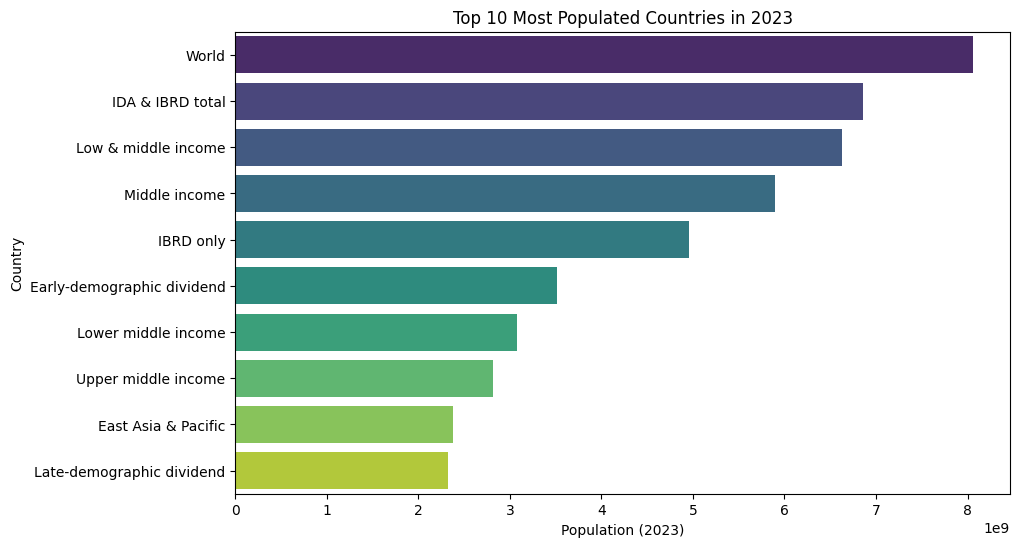

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_2023, x="2023", y="Country Name", hue="Country Name", palette="viridis", legend=False)

plt.xlabel("Population (2023)")
plt.ylabel("Country")
plt.title("Top 10 Most Populated Countries in 2023")
plt.show()


### Create a Histogram for Population Distribution



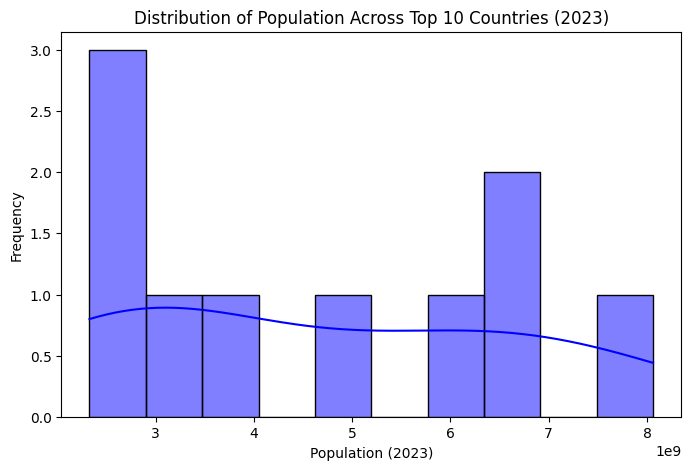

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df_2023["2023"], bins=10, kde=True, color="blue")

plt.xlabel("Population (2023)")
plt.ylabel("Frequency")
plt.title("Distribution of Population Across Top 10 Countries (2023)")
plt.show()


### Note :
In our dataset (World Bank Population Data), we are dealing with both continuous and categorical data so I hv tried to bring in both Visualization :

1. Categorical Data (Qualitative)
"Country Name" → Represents different countries (categories).

"Indicator Name" & "Indicator Code" → These are descriptive categories (e.g., "Total Population").

Any grouped data (e.g., continent-wise classification) would also be categorical.

2. Continuous Data (Quantitative)
Population values (1960–2023) → These are numeric, measurable values that can take any real number (e.g., 1,234,567).

Any column containing numerical population counts over time is continuous.

### Line Plot - Population Growth Over Time for a Country
This shows the trend of population growth for a specific country.

In [14]:
# Select a country (e.g., India)
country_name = "India"
country_data = df[df["Country Name"] == country_name].drop(columns=["Country Name"]).set_index(df.columns[0]).T

# Convert index to integers (years)
country_data.index = country_data.index.astype(int)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=country_data, marker="o", color="red")

plt.xlabel("Year")
plt.ylabel("Population")
plt.title(f"Population Growth in {country_name} (1960-2023)")
plt.grid()
plt.show()


KeyError: "None of ['Country Name'] are in the columns"